In [1]:
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import warnings
from scipy.interpolate import interp2d
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm

In [2]:
def simple_read(path):
    with open(path) as f:
        first_line = f.readline()
        header_line = int(first_line[0:-2].split(",")[0])-1
        #all_lines = f.readlines()
    data = pd.read_csv(path, sep=',', skiprows=header_line)
    data.columns = [i.strip() for i in data.columns]
    #date = all_lines[5][0:10].split(',')
    #dt = datetime(int(date[0]), int(date[1]), int(date[2]))

    acc = 0
    boo = False
    for letter in path:
        if letter == '2':
            boo = True
        elif boo and letter == '0':
            acc -= 1
            break
        acc += 1
    #print(path[:acc+4], path[acc+4:acc+6], path[acc+6:acc+8])
    dt = datetime(int(path[acc:acc+4]), int(path[acc+4:acc+6]), int(path[acc+6:acc+8]))
    
    for column in data.keys():
        if 'Time' in column:
            data[column] = dt + pd.to_timedelta(data[column], unit='seconds')
    return data.replace(-999999, np.NaN)

In [3]:
DAY22 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220602_RA_L1_20230331T150316.ict')
start_index = np.where(DAY22["Time_Start"] == pd.to_datetime("2022-06-02 12:58:55"))
stop_index = np.where(DAY22["Time_Start"] == pd.to_datetime("2022-06-02 13:10:00"))

DAY22_subset = DAY22[start_index[0][0]:stop_index[0][0]]

# Print the modified subset dataframe
DAY22_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
5981,2022-06-02 12:58:55,2022-06-02 12:58:56,32.901061,-69.417865,115.705,24.050,994.090,NaN,NaN,23660.80,NaN,78.6,4.804000e-08,15.580,0.12,1.195,1.035,NaN
5982,2022-06-02 12:58:56,2022-06-02 12:58:57,32.901505,-69.416658,115.605,24.070,994.320,NaN,NaN,23541.70,NaN,78.2,1.154000e-07,14.935,0.17,1.300,1.060,NaN
5983,2022-06-02 12:58:57,2022-06-02 12:58:58,32.901950,-69.415451,114.775,24.065,994.480,NaN,NaN,23514.80,NaN,77.9,0.000000e+00,14.270,0.26,1.440,1.080,NaN
5984,2022-06-02 12:58:58,2022-06-02 12:58:59,32.902395,-69.414241,113.025,24.085,994.800,NaN,NaN,23445.90,NaN,77.8,1.306000e-07,14.190,0.27,1.470,1.090,NaN
5985,2022-06-02 12:58:59,2022-06-02 12:59:00,32.902841,-69.413027,110.485,24.125,995.275,NaN,NaN,23508.00,NaN,77.9,3.215000e-07,14.410,0.25,1.435,1.100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,2022-06-02 13:09:55,2022-06-02 13:09:56,32.856578,-69.176604,3810.860,3.060,638.585,5.515,194.5440,1764.23,NaN,14.8,0.000000e+00,-1.200,NaN,NaN,NaN,NaN
6642,2022-06-02 13:09:56,2022-06-02 13:09:57,32.856534,-69.174895,3811.410,3.040,638.575,5.300,196.1934,1791.34,NaN,15.0,0.000000e+00,1.745,NaN,NaN,NaN,NaN
6643,2022-06-02 13:09:57,2022-06-02 13:09:58,32.856492,-69.173186,3812.340,3.005,638.445,5.160,196.9156,2054.82,NaN,17.3,0.000000e+00,3.730,NaN,NaN,NaN,NaN
6644,2022-06-02 13:09:58,2022-06-02 13:09:59,32.856451,-69.171477,3813.680,2.985,638.315,5.280,197.0445,2355.48,NaN,19.8,0.000000e+00,1.235,NaN,NaN,NaN,NaN


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-02]')

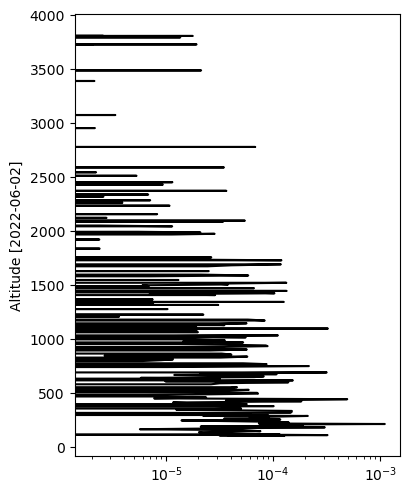

In [4]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY22_subset['LWC_FCDP_VOIGT']*1000, DAY22_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-02]')

In [5]:
DAY2 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220602_RA_L1_20230331T150316.ict')
start_index = np.where(DAY2["Time_Start"]==pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(DAY2["Time_Start"]==pd.to_datetime("2022-06-02 14:10:00"))
    
DAY2_subset = DAY2[start_index[0][0]:stop_index[0][0]]
DAY2_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
8926,2022-06-02 13:48:00,2022-06-02 13:48:01,32.397719,-65.920473,1896.68,12.265,806.650,3.670,265.8606,10577.00,NaN,59.7,0.0,7.500,-0.285,0.675,0.540,NaN
8927,2022-06-02 13:48:01,2022-06-02 13:48:02,32.397400,-65.918900,1897.28,12.245,806.615,3.795,268.2852,10629.20,NaN,60.1,0.0,7.860,-0.305,0.655,0.535,NaN
8928,2022-06-02 13:48:02,2022-06-02 13:48:03,32.397079,-65.917327,1898.01,12.225,806.525,3.815,270.6952,10689.70,NaN,60.5,0.0,6.445,-0.050,1.000,0.580,NaN
8929,2022-06-02 13:48:03,2022-06-02 13:48:04,32.396758,-65.915754,1898.83,12.215,806.410,3.755,270.9941,10748.20,NaN,60.9,0.0,4.240,0.220,1.360,0.630,NaN
8930,2022-06-02 13:48:04,2022-06-02 13:48:05,32.396435,-65.914182,1899.75,12.200,806.305,3.720,269.8450,10752.00,NaN,60.9,0.0,3.630,-0.010,0.990,0.745,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10241,2022-06-02 14:09:55,2022-06-02 14:09:56,32.272869,-64.969777,2855.32,9.315,719.965,NaN,NaN,2491.56,NaN,15.3,0.0,6.495,-0.050,0.930,1.600,NaN
10242,2022-06-02 14:09:56,2022-06-02 14:09:57,32.273564,-64.970808,2861.28,9.295,719.475,NaN,NaN,2397.14,NaN,14.7,0.0,3.370,NaN,NaN,1.590,NaN
10243,2022-06-02 14:09:57,2022-06-02 14:09:58,32.274234,-64.971861,2867.15,9.260,718.840,NaN,NaN,2331.74,NaN,14.3,0.0,-1.400,NaN,NaN,1.605,NaN
10244,2022-06-02 14:09:58,2022-06-02 14:09:59,32.274877,-64.972937,2872.99,9.225,718.225,NaN,NaN,2289.79,NaN,14.1,0.0,-1.775,NaN,NaN,1.615,NaN


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-02]')

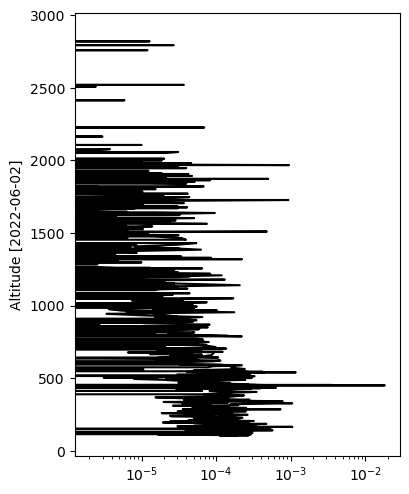

In [6]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY2_subset['LWC_FCDP_VOIGT']*1000, DAY2_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-02]')

In [7]:
DAY2b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220602_RA_L2_20230331T150316.ict')
start_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:53:00"))
DAY2b_subset = DAY2b[start_index[0][0]:stop_index[0][0]]
DAY2b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
9180,2022-06-02 18:36:00,2022-06-02 18:36:01,32.312301,-65.009805,191.225,23.290,986.105,NaN,NaN,23924.90,NaN,82.5,1.652000e-08,11.885,0.450,1.875,1.310,NaN
9181,2022-06-02 18:36:01,2022-06-02 18:36:02,32.312336,-65.010962,193.480,23.280,985.870,NaN,NaN,24157.10,NaN,83.4,1.205000e-07,12.500,0.220,1.390,1.265,NaN
9182,2022-06-02 18:36:02,2022-06-02 18:36:03,32.312332,-65.012116,195.600,23.265,985.670,NaN,NaN,24284.40,NaN,83.8,4.715000e-07,11.780,0.185,1.305,1.230,NaN
9183,2022-06-02 18:36:03,2022-06-02 18:36:04,32.312294,-65.013268,197.010,23.245,985.485,NaN,NaN,24487.90,NaN,84.7,1.111000e-08,11.830,0.200,1.330,1.200,NaN
9184,2022-06-02 18:36:04,2022-06-02 18:36:05,32.312221,-65.014415,197.440,23.215,985.315,NaN,NaN,24542.80,NaN,85.0,2.149000e-07,12.460,0.200,1.330,1.175,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,2022-06-02 18:52:55,2022-06-02 18:52:56,32.205808,-64.977280,3678.610,4.190,651.395,NaN,NaN,4352.94,NaN,34.4,0.000000e+00,NaN,NaN,NaN,NaN,NaN
10196,2022-06-02 18:52:56,2022-06-02 18:52:57,32.205215,-64.976028,3684.900,4.180,650.880,NaN,NaN,3523.91,NaN,27.8,0.000000e+00,3.760,NaN,NaN,NaN,NaN
10197,2022-06-02 18:52:57,2022-06-02 18:52:58,32.204648,-64.974760,3691.340,4.220,650.300,NaN,NaN,3263.07,NaN,25.6,0.000000e+00,3.415,NaN,NaN,NaN,NaN
10198,2022-06-02 18:52:58,2022-06-02 18:52:59,32.204104,-64.973478,3697.790,4.295,649.820,NaN,NaN,3090.55,NaN,24.1,0.000000e+00,3.070,NaN,NaN,NaN,NaN


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-02b]')

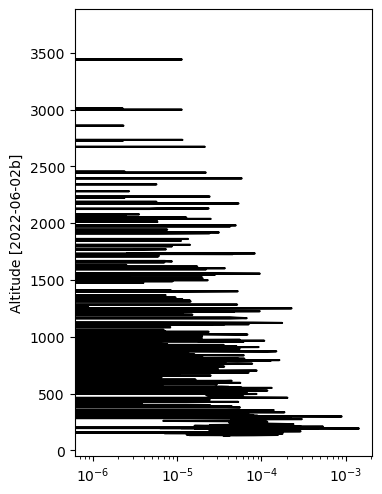

In [8]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY2b_subset['LWC_FCDP_VOIGT']*1000, DAY2b_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-02b]')

In [9]:
DAY3 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220603_RA_20230331T150317.ict')
start_index = np.where(DAY3["Time_Start"]==pd.to_datetime("2022-06-03 14:30:00"))
stop_index = np.where(DAY3["Time_Start"]==pd.to_datetime("2022-06-03 15:00:00"))
    
DAY3_subset = DAY3[start_index[0][0]:stop_index[0][0]]
DAY3_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
6067,2022-06-03 14:30:00,2022-06-03 14:30:01,34.190994,-67.265135,1562.46,16.540,837.685,3.560,206.8763,8710.74,NaN,38.8,0.000000e+00,11.935,NaN,NaN,1.525,NaN
6068,2022-06-03 14:30:01,2022-06-03 14:30:02,34.190286,-67.266362,1561.51,16.525,837.530,3.770,205.5922,8688.73,NaN,38.7,0.000000e+00,10.915,NaN,NaN,1.515,NaN
6069,2022-06-03 14:30:02,2022-06-03 14:30:03,34.189579,-67.267591,1560.55,16.555,837.815,3.680,203.6018,8670.20,NaN,38.5,4.012000e-08,11.290,NaN,NaN,1.515,NaN
6070,2022-06-03 14:30:03,2022-06-03 14:30:04,34.188873,-67.268822,1559.66,16.575,838.045,3.525,204.3952,8721.81,NaN,38.7,0.000000e+00,12.525,NaN,NaN,1.500,NaN
6071,2022-06-03 14:30:04,2022-06-03 14:30:05,34.188167,-67.270053,1558.86,16.565,837.975,3.590,205.7602,8656.78,NaN,38.5,1.151000e-08,12.870,NaN,NaN,1.480,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7862,2022-06-03 14:59:55,2022-06-03 14:59:56,32.712767,-65.244314,2413.61,10.995,758.980,NaN,NaN,11519.60,NaN,66.6,0.000000e+00,1.730,NaN,NaN,0.675,NaN
7863,2022-06-03 14:59:56,2022-06-03 14:59:57,32.712103,-65.243151,2408.15,11.045,759.535,NaN,NaN,11649.70,NaN,67.1,0.000000e+00,1.650,NaN,NaN,0.570,NaN
7864,2022-06-03 14:59:57,2022-06-03 14:59:58,32.711441,-65.241989,2402.02,11.090,760.065,NaN,NaN,11698.40,NaN,67.3,0.000000e+00,2.495,NaN,NaN,0.455,NaN
7865,2022-06-03 14:59:58,2022-06-03 14:59:59,32.710779,-65.240827,2395.43,11.130,760.570,NaN,NaN,11817.70,NaN,67.8,0.000000e+00,2.610,NaN,NaN,0.430,NaN


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-03]')

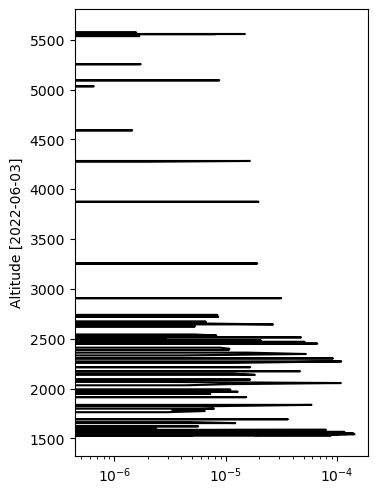

In [10]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY3_subset['LWC_FCDP_VOIGT']*1000, DAY3_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-03]')

In [11]:
DAY7 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220607_RA_L1_20230331T150318.ict')
start_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:47:00"))
    
DAY7_subset =DAY7[start_index[0][0]:stop_index[0][0]]
DAY7_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10397,2022-06-07 14:32:00,2022-06-07 14:32:01,32.250498,-64.999220,127.595,21.705,1000.690,NaN,NaN,16839.20,NaN,64.8,2.102000e-07,21.970,0.225,1.380,0.540,NaN
10398,2022-06-07 14:32:01,2022-06-07 14:32:02,32.249883,-64.998233,126.585,21.705,1000.730,NaN,NaN,16797.70,NaN,64.7,6.026000e-08,23.210,0.225,1.380,0.535,NaN
10399,2022-06-07 14:32:02,2022-06-07 14:32:03,32.249267,-64.997244,125.870,21.700,1000.550,NaN,NaN,16749.30,NaN,64.5,1.223000e-07,22.465,0.220,1.370,0.530,NaN
10400,2022-06-07 14:32:03,2022-06-07 14:32:04,32.248648,-64.996254,125.955,21.735,1000.850,NaN,NaN,16872.70,NaN,65.0,8.455000e-08,22.830,0.110,1.170,0.525,NaN
10401,2022-06-07 14:32:04,2022-06-07 14:32:05,32.248027,-64.995263,126.990,21.755,1001.140,NaN,NaN,16893.50,NaN,64.9,2.812000e-07,22.345,0.155,1.245,0.525,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292,2022-06-07 14:46:55,2022-06-07 14:46:56,32.255021,-64.999573,2800.660,9.430,728.710,NaN,NaN,4644.94,NaN,28.6,0.000000e+00,NaN,NaN,NaN,NaN,NaN
11293,2022-06-07 14:46:56,2022-06-07 14:46:57,32.255098,-64.998248,2805.770,9.405,728.240,NaN,NaN,4638.46,NaN,28.6,0.000000e+00,NaN,NaN,NaN,NaN,NaN
11294,2022-06-07 14:46:57,2022-06-07 14:46:58,32.255152,-64.996919,2810.920,9.380,727.790,NaN,NaN,4632.07,NaN,28.6,0.000000e+00,NaN,NaN,NaN,NaN,NaN
11295,2022-06-07 14:46:58,2022-06-07 14:46:59,32.255184,-64.995588,2816.140,9.355,727.350,NaN,NaN,4619.24,NaN,28.6,0.000000e+00,NaN,NaN,NaN,NaN,NaN


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-07]')

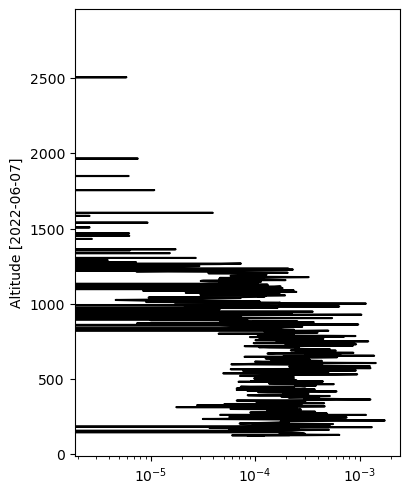

In [12]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY7_subset['LWC_FCDP_VOIGT']*1000, DAY7_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-07]')

In [13]:
DAY7b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220607_RA_L2_20230331T150318.ict')
start_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:23:00"))
    
DAY7b_subset = DAY7b[start_index[0][0]:stop_index[0][0]]
DAY7b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10420,2022-06-07 19:08:00,2022-06-07 19:08:01,32.242823,-65.003952,133.320,21.455,1000.570,NaN,NaN,15735.40,NaN,61.5,4.608000e-07,NaN,NaN,NaN,NaN,NaN
10421,2022-06-07 19:08:01,2022-06-07 19:08:02,32.243085,-65.002775,133.120,21.445,1000.450,NaN,NaN,15843.90,NaN,62.0,2.882000e-07,NaN,NaN,NaN,NaN,NaN
10422,2022-06-07 19:08:02,2022-06-07 19:08:03,32.243347,-65.001596,132.930,21.440,1000.440,NaN,NaN,15702.70,NaN,61.4,7.440000e-07,NaN,NaN,NaN,NaN,NaN
10423,2022-06-07 19:08:03,2022-06-07 19:08:04,32.243610,-65.000416,132.720,21.460,1000.480,NaN,NaN,15831.60,NaN,61.8,1.216000e-07,NaN,NaN,NaN,NaN,NaN
10424,2022-06-07 19:08:04,2022-06-07 19:08:05,32.243873,-64.999235,132.595,21.475,999.490,NaN,NaN,15879.90,NaN,61.9,2.819000e-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11315,2022-06-07 19:22:55,2022-06-07 19:22:56,32.296480,-65.011792,3518.030,5.895,667.750,NaN,NaN,2764.12,NaN,19.9,0.000000e+00,NaN,NaN,NaN,NaN,NaN
11316,2022-06-07 19:22:56,2022-06-07 19:22:57,32.296519,-65.013093,3524.890,5.850,667.230,NaN,NaN,2756.72,NaN,19.9,6.322000e-09,NaN,NaN,NaN,NaN,NaN
11317,2022-06-07 19:22:57,2022-06-07 19:22:58,32.296518,-65.014396,3531.840,5.795,666.645,NaN,NaN,2770.03,NaN,20.1,0.000000e+00,NaN,NaN,NaN,NaN,NaN
11318,2022-06-07 19:22:58,2022-06-07 19:22:59,32.296479,-65.015699,3538.850,5.735,666.015,NaN,NaN,2763.17,NaN,20.1,0.000000e+00,NaN,NaN,NaN,NaN,NaN


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-07b]')

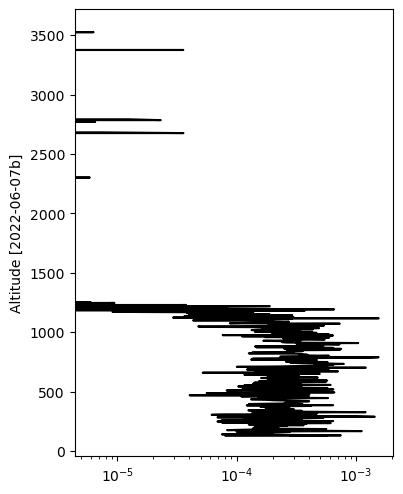

In [14]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY7b_subset['LWC_FCDP_VOIGT']*1000, DAY7b_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-07b]')

In [15]:
DAY8 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220608_RA_L2_20230331T150319.ict')
start_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:45:00"))
    
DAY8_subset = DAY8[start_index[0][0]:stop_index[0][0]]
DAY8_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10668,2022-06-08 20:30:00,2022-06-08 20:30:01,32.267080,-64.998961,152.725,21.365,996.830,NaN,NaN,15886.50,NaN,62.2,1.062000e-07,10.810,-0.070,0.905,0.500,NaN
10669,2022-06-08 20:30:01,2022-06-08 20:30:02,32.268158,-64.999178,153.350,21.390,997.210,NaN,NaN,15896.40,NaN,62.0,1.730000e-08,10.945,-0.060,0.915,0.480,NaN
10670,2022-06-08 20:30:02,2022-06-08 20:30:03,32.269234,-64.999434,153.870,21.405,997.280,NaN,NaN,15824.80,NaN,62.0,2.844000e-08,11.415,-0.045,0.935,0.475,NaN
10671,2022-06-08 20:30:03,2022-06-08 20:30:04,32.270310,-64.999724,154.255,21.375,996.955,NaN,NaN,15730.00,NaN,61.5,1.337000e-07,13.115,-0.170,0.800,0.480,NaN
10672,2022-06-08 20:30:04,2022-06-08 20:30:05,32.271382,-65.000051,154.510,21.390,997.080,NaN,NaN,15669.80,NaN,61.3,9.848000e-08,13.730,-0.215,0.745,0.500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11563,2022-06-08 20:44:55,2022-06-08 20:44:56,32.251172,-65.086081,3838.620,3.190,642.185,NaN,NaN,7232.41,NaN,60.6,0.000000e+00,3.455,NaN,NaN,NaN,1.270
11564,2022-06-08 20:44:56,2022-06-08 20:44:57,32.250122,-65.085465,3847.170,3.130,641.500,NaN,NaN,7435.93,NaN,62.5,0.000000e+00,1.290,NaN,NaN,NaN,1.380
11565,2022-06-08 20:44:57,2022-06-08 20:44:58,32.249088,-65.084808,3855.660,3.065,640.845,NaN,NaN,7422.39,NaN,62.6,0.000000e+00,0.510,NaN,NaN,NaN,1.480
11566,2022-06-08 20:44:58,2022-06-08 20:44:59,32.248074,-65.084107,3864.100,3.005,640.175,NaN,NaN,7427.72,NaN,62.8,0.000000e+00,2.550,NaN,NaN,NaN,1.525


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-08]')

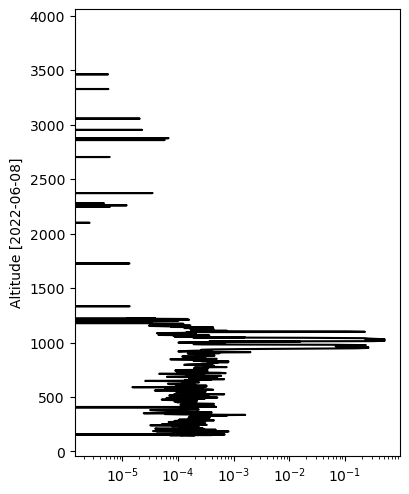

In [16]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY8_subset['LWC_FCDP_VOIGT']*1000, DAY8_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-08]')

In [17]:
DAY11 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220611_RA_L1_20230331T150321.ict')
start_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:42:00"))
    
DAY11_subset = DAY11[start_index[0][0]:stop_index[0][0]]
DAY11_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10800,2022-06-11 15:24:00,2022-06-11 15:24:01,32.234864,-64.977277,137.985,23.790,999.890,NaN,NaN,25501.70,NaN,86.5,5.759000e-07,33.590,-0.135,0.830,0.365,NaN
10801,2022-06-11 15:24:01,2022-06-11 15:24:02,32.233969,-64.976649,138.245,23.800,999.925,NaN,NaN,25359.00,NaN,85.9,9.413000e-08,34.610,-0.135,0.830,0.375,NaN
10802,2022-06-11 15:24:02,2022-06-11 15:24:03,32.233058,-64.976063,138.485,23.770,999.845,NaN,NaN,25607.50,NaN,86.9,5.510000e-07,37.075,-0.175,0.785,0.380,NaN
10803,2022-06-11 15:24:03,2022-06-11 15:24:04,32.232130,-64.975521,138.740,23.725,999.830,NaN,NaN,25821.30,NaN,88.0,5.228000e-07,38.925,-0.205,0.750,0.380,NaN
10804,2022-06-11 15:24:04,2022-06-11 15:24:05,32.231186,-64.975026,139.035,23.715,999.790,NaN,NaN,25578.10,NaN,87.1,4.740000e-07,38.600,-0.120,0.845,0.375,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,2022-06-11 15:41:55,2022-06-11 15:41:56,32.259305,-64.971567,4701.700,-0.945,579.020,NaN,NaN,5560.38,57.0,56.5,0.000000e+00,NaN,NaN,NaN,NaN,0.930
11876,2022-06-11 15:41:56,2022-06-11 15:41:57,32.258543,-64.970428,4708.440,-0.995,578.440,NaN,NaN,5677.99,58.3,57.8,0.000000e+00,NaN,NaN,NaN,NaN,1.020
11877,2022-06-11 15:41:57,2022-06-11 15:41:58,32.257745,-64.969326,4714.800,-1.050,577.855,NaN,NaN,5518.96,57.0,56.4,0.000000e+00,NaN,NaN,NaN,NaN,1.075
11878,2022-06-11 15:41:58,2022-06-11 15:41:59,32.256913,-64.968261,4720.960,-1.060,577.585,NaN,NaN,5392.89,55.7,55.1,0.000000e+00,NaN,NaN,NaN,NaN,0.975


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-11]')

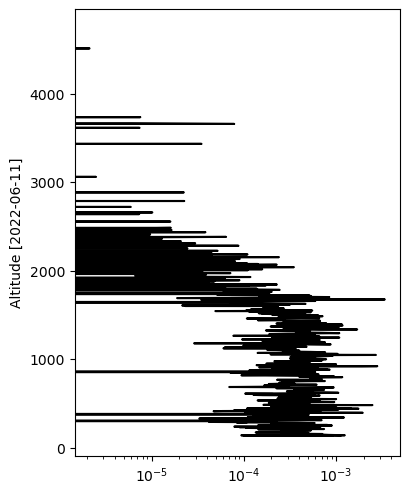

In [18]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY11_subset['LWC_FCDP_VOIGT']*1000, DAY11_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-11]')

In [19]:
DAY11b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220611_RA_L2_20230331T150321.ict')
start_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:00:00"))
stop_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:30:00"))
    
DAY11b_subset = DAY11b[start_index[0][0]:stop_index[0][0]]
DAY11b

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
0,2022-06-11 17:24:10,2022-06-11 17:24:11,32.363775,-64.677061,-27.245,26.855,1020.21,NaN,NaN,27441.8,NaN,80.0,0.000000e+00,30.765,0.135,1.210,0.420,0.81
1,2022-06-11 17:24:11,2022-06-11 17:24:12,32.363892,-64.677731,-27.070,26.715,1019.99,NaN,NaN,27929.6,NaN,81.9,0.000000e+00,22.590,0.170,1.265,0.420,0.81
2,2022-06-11 17:24:12,2022-06-11 17:24:13,32.364029,-64.678511,-26.720,26.600,1019.71,NaN,NaN,27700.5,NaN,81.6,0.000000e+00,19.550,0.070,1.115,0.425,0.80
3,2022-06-11 17:24:13,2022-06-11 17:24:14,32.364171,-64.679307,-25.810,26.505,1019.29,NaN,NaN,27789.0,NaN,82.2,0.000000e+00,29.445,-0.025,0.965,0.425,0.79
4,2022-06-11 17:24:14,2022-06-11 17:24:15,32.364317,-64.680116,-24.095,26.385,1019.02,NaN,NaN,27499.7,NaN,82.9,0.000000e+00,1030.060,0.005,1.005,0.420,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12071,2022-06-11 20:45:21,2022-06-11 20:45:22,32.361916,-64.666333,-24.615,25.505,1017.68,NaN,NaN,27051.2,NaN,83.6,2.249000e-06,33.095,NaN,NaN,0.420,NaN
12072,2022-06-11 20:45:22,2022-06-11 20:45:23,32.362029,-64.666989,-25.595,25.640,1018.04,NaN,NaN,27229.7,NaN,83.0,3.927000e-08,33.725,NaN,NaN,0.435,NaN
12073,2022-06-11 20:45:23,2022-06-11 20:45:24,32.362142,-64.667640,-26.350,25.830,1018.58,NaN,NaN,27453.7,NaN,83.1,0.000000e+00,31.985,NaN,NaN,0.435,NaN
12074,2022-06-11 20:45:24,2022-06-11 20:45:25,32.362253,-64.668285,-26.900,25.990,1019.00,NaN,NaN,27591.5,NaN,83.3,0.000000e+00,33.430,NaN,NaN,0.430,NaN


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-11b]')

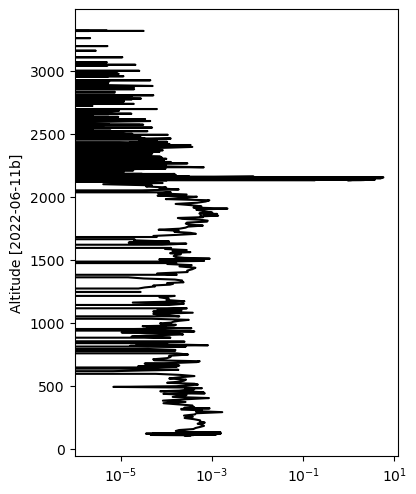

In [20]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY11b_subset['LWC_FCDP_VOIGT']*1000, DAY11b_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-11b]')

In [21]:
DAY10 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220610_RA_L1_20230331T150320.ict')
start_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:25:00"))
    
DAY10_subset = DAY10[start_index[0][0]:stop_index[0][0]]
DAY10_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10616,2022-06-10 15:17:00,2022-06-10 15:17:01,32.206691,-64.996969,122.040,23.330,999.380,7.050,203.0607,25488.50,NaN,88.8,2.604000e-07,NaN,NaN,NaN,NaN,NaN
10617,2022-06-10 15:17:01,2022-06-10 15:17:02,32.207809,-64.997169,122.105,23.320,999.460,6.845,198.9442,25497.90,NaN,89.1,7.398000e-07,NaN,NaN,NaN,NaN,NaN
10618,2022-06-10 15:17:02,2022-06-10 15:17:03,32.208928,-64.997370,122.170,23.280,999.100,6.775,202.2206,25324.60,NaN,88.5,5.723000e-07,NaN,NaN,NaN,NaN,NaN
10619,2022-06-10 15:17:03,2022-06-10 15:17:04,32.210048,-64.997569,122.240,23.315,998.935,7.155,207.5966,25191.40,NaN,87.5,2.257000e-07,NaN,NaN,NaN,NaN,NaN
10620,2022-06-10 15:17:04,2022-06-10 15:17:05,32.211167,-64.997768,122.315,23.370,999.405,7.360,203.4736,25468.50,NaN,88.6,4.218000e-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11091,2022-06-10 15:24:55,2022-06-10 15:24:56,32.207088,-65.031191,3540.260,7.225,666.390,NaN,NaN,6057.59,NaN,39.7,0.000000e+00,NaN,NaN,NaN,NaN,NaN
11092,2022-06-10 15:24:56,2022-06-10 15:24:57,32.207061,-65.029663,3546.970,7.175,665.850,NaN,NaN,6032.39,NaN,39.7,0.000000e+00,NaN,NaN,NaN,NaN,NaN
11093,2022-06-10 15:24:57,2022-06-10 15:24:58,32.207068,-65.028134,3553.620,7.145,665.320,NaN,NaN,6169.95,NaN,40.6,1.062000e-08,NaN,NaN,NaN,NaN,NaN
11094,2022-06-10 15:24:58,2022-06-10 15:24:59,32.207109,-65.026603,3560.200,7.115,664.770,NaN,NaN,6278.46,NaN,41.4,0.000000e+00,NaN,NaN,NaN,NaN,NaN


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-10]')

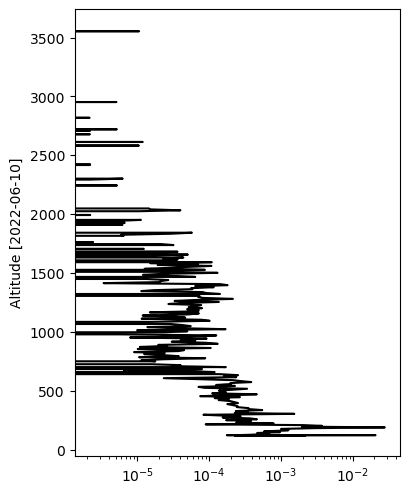

In [22]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY10_subset['LWC_FCDP_VOIGT']*1000, DAY10_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-10]')

In [23]:
DAY10b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220610_RA_L2_20230331T150320.ict')
start_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 19:51:00"))
    
DAY10b_subset = DAY10b[start_index[0][0]:stop_index[0][0]]
DAY10b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
7182,2022-06-10 19:30:00,2022-06-10 19:30:01,31.639092,-65.606420,113.375,24.160,999.250,NaN,NaN,26111.60,NaN,86.6,3.528000e-08,28.855,-0.025,0.965,0.455,NaN
7183,2022-06-10 19:30:01,2022-06-10 19:30:02,31.639446,-65.607515,113.225,24.150,999.225,NaN,NaN,26120.50,NaN,86.7,3.256000e-07,28.940,0.010,1.015,0.440,NaN
7184,2022-06-10 19:30:02,2022-06-10 19:30:03,31.639806,-65.608607,113.065,24.135,999.200,NaN,NaN,26162.00,NaN,86.9,3.064000e-07,30.580,-0.070,0.905,0.420,NaN
7185,2022-06-10 19:30:03,2022-06-10 19:30:04,31.640170,-65.609698,112.970,24.125,999.235,NaN,NaN,26162.80,NaN,86.9,2.264000e-07,29.795,-0.105,0.860,0.405,NaN
7186,2022-06-10 19:30:04,2022-06-10 19:30:05,31.640539,-65.610788,112.985,24.120,999.250,NaN,NaN,26155.50,NaN,86.9,3.942000e-07,31.475,-0.100,0.870,0.390,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8437,2022-06-10 19:50:55,2022-06-10 19:50:56,31.228702,-65.973911,4967.450,-1.930,557.140,6.380,226.5692,3494.51,37.2,36.6,0.000000e+00,5.205,NaN,NaN,0.590,1.360
8438,2022-06-10 19:50:56,2022-06-10 19:50:57,31.227365,-65.974288,4964.110,-1.845,557.470,6.495,229.5907,3359.14,35.7,35.0,0.000000e+00,7.105,NaN,NaN,0.445,1.335
8439,2022-06-10 19:50:57,2022-06-10 19:50:58,31.226025,-65.974659,4960.810,-1.830,557.350,6.770,228.6555,3280.77,34.8,34.2,0.000000e+00,8.785,NaN,NaN,0.375,1.215
8440,2022-06-10 19:50:58,2022-06-10 19:50:59,31.224682,-65.975025,4957.520,-1.795,557.400,6.735,226.0743,3183.61,33.6,33.1,0.000000e+00,7.800,NaN,NaN,0.405,1.185


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-10b]')

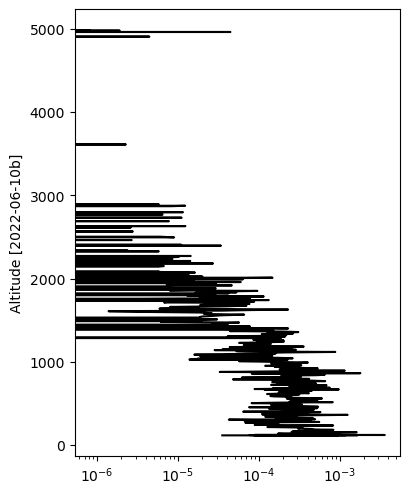

In [24]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY10b_subset['LWC_FCDP_VOIGT']*1000, DAY10b_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-10b]')

In [25]:
DAY13 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220613_RA_L1_20230331T150322.ict')
start_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:30:00"))
stop_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:46:00"))
    
DAY13_subset = DAY13[start_index[0][0]:stop_index[0][0]]
DAY13_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10015,2022-06-13 14:30:00,2022-06-13 14:30:01,32.210354,-65.054053,141.795,23.865,1001.400,NaN,NaN,25907.30,NaN,87.6,1.171000e-07,8.225,0.225,1.375,1.050,NaN
10016,2022-06-13 14:30:01,2022-06-13 14:30:02,32.209934,-65.052981,141.725,23.835,1001.240,NaN,NaN,25840.90,NaN,87.3,1.386000e-07,7.550,0.215,1.355,1.015,NaN
10017,2022-06-13 14:30:02,2022-06-13 14:30:03,32.209541,-65.051894,141.615,23.830,1001.510,NaN,NaN,26208.80,NaN,88.8,2.691000e-07,8.530,0.140,1.215,0.975,NaN
10018,2022-06-13 14:30:03,2022-06-13 14:30:04,32.209173,-65.050793,141.460,23.855,1001.800,NaN,NaN,26363.80,NaN,89.3,2.140000e-07,9.430,0.075,1.120,0.960,NaN
10019,2022-06-13 14:30:04,2022-06-13 14:30:05,32.208832,-65.049680,141.275,23.840,1001.640,NaN,NaN,26296.30,NaN,89.1,2.268000e-07,8.685,0.070,1.110,0.925,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10970,2022-06-13 14:45:55,2022-06-13 14:45:56,32.197220,-65.046274,4504.770,-0.020,594.015,NaN,NaN,5501.68,NaN,53.3,0.000000e+00,NaN,NaN,NaN,NaN,1.175
10971,2022-06-13 14:45:56,2022-06-13 14:45:57,32.196954,-65.044914,4514.670,-0.115,593.295,NaN,NaN,5628.15,55.3,54.7,0.000000e+00,NaN,NaN,NaN,NaN,1.190
10972,2022-06-13 14:45:57,2022-06-13 14:45:58,32.196726,-65.043543,4523.980,-0.215,592.580,NaN,NaN,5951.96,58.3,58.2,0.000000e+00,NaN,NaN,NaN,NaN,1.190
10973,2022-06-13 14:45:58,2022-06-13 14:45:59,32.196539,-65.042160,4532.940,-0.295,591.910,NaN,NaN,6497.46,64.1,64.0,0.000000e+00,NaN,NaN,NaN,NaN,1.210


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-13]')

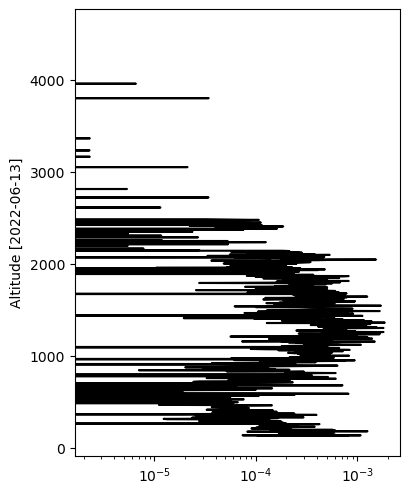

In [26]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY13_subset['LWC_FCDP_VOIGT']*1000, DAY13_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-13]')

In [27]:
DAY13b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220613_RA_L2_20230331T150322.ict')
start_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 20:09:00"))
    
DAY13b_subset = DAY13b[start_index[0][0]:stop_index[0][0]]
DAY13b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10610,2022-06-13 19:46:00,2022-06-13 19:46:01,32.251226,-65.007304,106.13,24.700,1005.880,NaN,NaN,26066.70,NaN,84.5,4.816000e-08,9.355,NaN,NaN,0.980,NaN
10611,2022-06-13 19:46:01,2022-06-13 19:46:02,32.250414,-65.006555,105.59,24.680,1005.410,NaN,NaN,25646.30,NaN,82.9,5.341000e-08,9.425,NaN,NaN,0.990,NaN
10612,2022-06-13 19:46:02,2022-06-13 19:46:03,32.249605,-65.005808,106.45,24.620,1004.580,NaN,NaN,25639.60,NaN,82.8,1.285000e-08,7.740,NaN,NaN,0.985,NaN
10613,2022-06-13 19:46:03,2022-06-13 19:46:04,32.248799,-65.005062,108.91,24.565,1003.920,NaN,NaN,25552.00,NaN,82.7,0.000000e+00,7.125,NaN,NaN,0.945,NaN
10614,2022-06-13 19:46:04,2022-06-13 19:46:05,32.247996,-65.004323,112.60,24.550,1003.770,NaN,NaN,25819.50,NaN,83.8,1.368000e-07,7.570,NaN,NaN,0.895,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,2022-06-13 20:08:55,2022-06-13 20:08:56,32.290180,-64.996666,4558.09,0.615,589.975,NaN,NaN,2366.71,NaN,21.7,0.000000e+00,NaN,NaN,NaN,NaN,1.335
11986,2022-06-13 20:08:56,2022-06-13 20:08:57,32.289203,-64.997413,4565.53,0.565,589.425,NaN,NaN,2557.26,NaN,23.6,0.000000e+00,NaN,NaN,NaN,NaN,1.290
11987,2022-06-13 20:08:57,2022-06-13 20:08:58,32.288204,-64.998124,4572.98,0.505,588.785,NaN,NaN,2592.85,NaN,24.0,0.000000e+00,NaN,NaN,NaN,NaN,1.310
11988,2022-06-13 20:08:58,2022-06-13 20:08:59,32.287185,-64.998799,4580.36,0.450,588.260,NaN,NaN,2517.42,NaN,23.3,0.000000e+00,NaN,NaN,NaN,NaN,1.350


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-13b]')

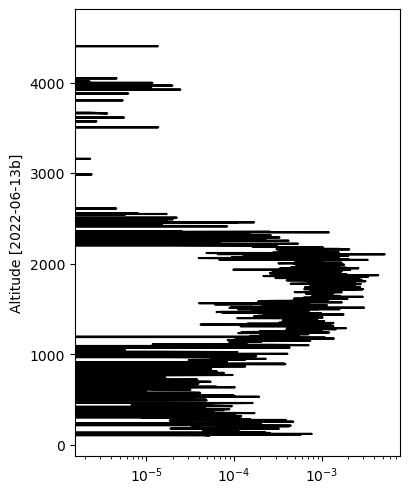

In [28]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY13b_subset['LWC_FCDP_VOIGT']*1000, DAY13b_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-13b]')

In [29]:
DAY14 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220614_RA_20230331T150323.ict')
start_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:25:00"))
    
DAY14_subset = DAY14[start_index[0][0]:stop_index[0][0]]
DAY14_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
9363,2022-06-14 16:05:00,2022-06-14 16:05:01,30.642555,-64.394685,117.000,25.355,1002.560,NaN,NaN,25354.80,NaN,78.5,3.465000e-08,13.975,-0.330,0.695,0.100,NaN
9364,2022-06-14 16:05:01,2022-06-14 16:05:02,30.641725,-64.395343,117.085,25.370,1002.640,NaN,NaN,25260.60,NaN,78.1,0.000000e+00,14.335,-0.235,0.840,0.110,NaN
9365,2022-06-14 16:05:02,2022-06-14 16:05:03,30.640923,-64.396042,117.190,25.370,1002.640,NaN,NaN,25567.60,NaN,79.1,3.028000e-07,12.810,0.050,1.085,0.120,NaN
9366,2022-06-14 16:05:03,2022-06-14 16:05:04,30.640148,-64.396780,117.295,25.345,1002.400,NaN,NaN,25147.60,NaN,78.0,0.000000e+00,13.675,-0.080,0.890,0.100,NaN
9367,2022-06-14 16:05:04,2022-06-14 16:05:05,30.639403,-64.397555,117.380,25.375,1002.530,NaN,NaN,25094.50,NaN,77.5,2.347000e-07,14.290,NaN,NaN,0.090,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10558,2022-06-14 16:24:55,2022-06-14 16:24:56,30.850057,-64.439182,8454.590,-26.050,353.175,NaN,NaN,1025.90,63.6,49.3,0.000000e+00,17.745,-0.305,0.665,0.020,1.140
10559,2022-06-14 16:24:56,2022-06-14 16:24:57,30.851471,-64.439393,8461.000,-26.100,352.890,NaN,NaN,1030.86,64.3,49.8,0.000000e+00,18.820,-0.445,0.570,-0.075,1.075
10560,2022-06-14 16:24:57,2022-06-14 16:24:58,30.852885,-64.439595,8467.420,-26.180,352.460,NaN,NaN,1026.98,64.4,49.9,0.000000e+00,18.660,-0.530,0.490,-0.175,0.945
10561,2022-06-14 16:24:58,2022-06-14 16:24:59,30.854300,-64.439786,8473.860,-26.260,351.990,NaN,NaN,1033.11,65.3,50.5,0.000000e+00,17.960,-0.565,0.470,-0.300,0.865


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-14]')

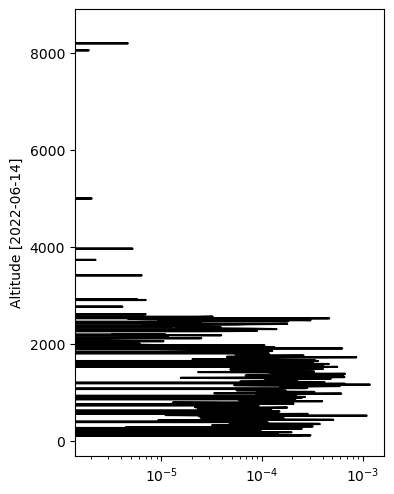

In [30]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY14_subset['LWC_FCDP_VOIGT']*1000, DAY14_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-14]')

In [31]:
DAY17 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220617_RA_20230331T150324.ict')
start_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:47:00"))
    
DAY17_subset = DAY17[start_index[0][0]:stop_index[0][0]]
DAY17_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10469,2022-06-17 16:20:00,2022-06-17 16:20:01,32.206574,-65.006772,134.100,21.905,995.935,NaN,NaN,17721.70,NaN,67.1,9.107000e-08,14.135,0.125,1.190,-0.310,NaN
10470,2022-06-17 16:20:01,2022-06-17 16:20:02,32.206131,-65.005761,133.795,21.935,996.415,NaN,NaN,17905.10,NaN,67.6,1.952000e-07,13.505,0.170,1.265,-0.305,NaN
10471,2022-06-17 16:20:02,2022-06-17 16:20:03,32.205725,-65.004728,133.485,21.940,996.745,NaN,NaN,17281.40,NaN,65.4,4.587000e-08,12.855,0.280,1.480,-0.290,NaN
10472,2022-06-17 16:20:03,2022-06-17 16:20:04,32.205357,-65.003676,133.170,21.930,996.505,NaN,NaN,16873.40,NaN,63.8,1.193000e-07,12.565,0.345,1.615,-0.280,NaN
10473,2022-06-17 16:20:04,2022-06-17 16:20:05,32.205027,-65.002606,132.825,21.950,996.455,NaN,NaN,16853.00,NaN,63.6,8.150000e-08,13.000,0.305,1.525,-0.270,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12084,2022-06-17 16:46:55,2022-06-17 16:46:56,32.158601,-65.020304,7639.050,-17.335,393.290,NaN,NaN,1735.02,51.4,43.4,0.000000e+00,NaN,NaN,NaN,NaN,1.460
12085,2022-06-17 16:46:56,2022-06-17 16:46:57,32.157293,-65.019563,7645.810,-17.400,392.950,NaN,NaN,1756.02,52.3,44.1,0.000000e+00,NaN,NaN,NaN,NaN,1.480
12086,2022-06-17 16:46:57,2022-06-17 16:46:58,32.156002,-65.018778,7652.610,-17.450,392.615,NaN,NaN,1723.14,51.5,43.4,0.000000e+00,NaN,NaN,NaN,NaN,1.460
12087,2022-06-17 16:46:58,2022-06-17 16:46:59,32.154729,-65.017953,7659.440,-17.510,392.220,NaN,NaN,1714.31,51.5,43.4,0.000000e+00,NaN,NaN,NaN,NaN,1.380


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-17]')

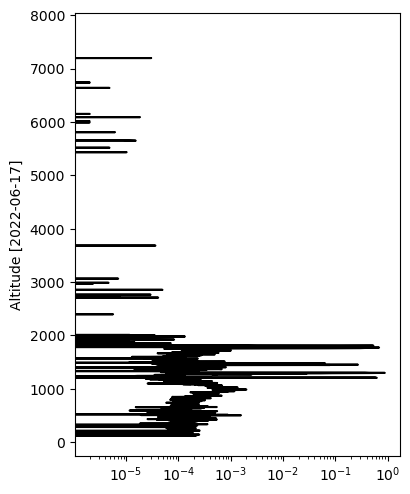

In [32]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY17_subset['LWC_FCDP_VOIGT']*1000, DAY17_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-17]')

In [33]:
DAY18 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/BLH/activate-mrg1_hu25_20220618_RA_20230331T150324.ict')
start_index = np.where(DAY18["Time_Start"]==pd.to_datetime("2022-06-18 14:09:00"))
stop_index = np.where(DAY18["Time_Start"]==pd.to_datetime("2022-06-18 14:33:00"))
    
DAY18_subset = DAY18[start_index[0][0]:stop_index[0][0]]
DAY18_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Wind_Speed_THORNHILL,Wind_Direction_THORNHILL,H2O_DLH_DISKIN,RHi_DLH_DISKIN,RHw_DLH_DISKIN,LWC_FCDP_VOIGT,Ext532_submicron_ZIEMBA,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
7425,2022-06-18 14:09:00,2022-06-18 14:09:01,36.589500,-71.990803,110.135,25.275,987.185,NaN,NaN,17357.10,NaN,53.2,1.769000e-07,23.830,0.200,1.330,1.470,NaN
7426,2022-06-18 14:09:01,2022-06-18 14:09:02,36.590250,-71.991516,110.155,25.270,987.250,NaN,NaN,17205.80,NaN,52.7,1.314000e-07,25.405,0.215,1.355,1.465,NaN
7427,2022-06-18 14:09:02,2022-06-18 14:09:03,36.591026,-71.992186,109.965,25.290,987.330,NaN,NaN,16312.10,NaN,50.0,1.789000e-07,21.790,0.220,1.365,1.450,NaN
7428,2022-06-18 14:09:03,2022-06-18 14:09:04,36.591824,-71.992808,109.535,25.335,987.780,NaN,NaN,16298.80,NaN,49.8,1.114000e-07,20.710,0.115,1.205,1.440,NaN
7429,2022-06-18 14:09:04,2022-06-18 14:09:05,36.592643,-71.993383,109.055,25.360,988.055,NaN,NaN,17040.50,NaN,52.0,5.461000e-07,20.320,0.020,1.035,1.445,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,2022-06-18 14:32:55,2022-06-18 14:32:56,36.634224,-71.921855,7949.270,-24.560,370.935,NaN,NaN,191.59,10.7,8.4,0.000000e+00,6.225,NaN,NaN,NaN,0.925
8861,2022-06-18 14:32:56,2022-06-18 14:32:57,36.634412,-71.923239,7954.260,-24.595,370.705,NaN,NaN,190.70,10.7,8.4,0.000000e+00,3.960,NaN,NaN,NaN,0.920
8862,2022-06-18 14:32:57,2022-06-18 14:32:58,36.634602,-71.924625,7959.290,-24.645,370.415,NaN,NaN,189.01,10.6,8.4,0.000000e+00,0.715,NaN,NaN,NaN,0.825
8863,2022-06-18 14:32:58,2022-06-18 14:32:59,36.634793,-71.926012,7964.380,-24.695,370.160,NaN,NaN,187.85,10.6,8.4,0.000000e+00,3.265,NaN,NaN,NaN,0.740


Text(-0.7777777777777768, 0.5, 'Altitude [2022-06-18]')

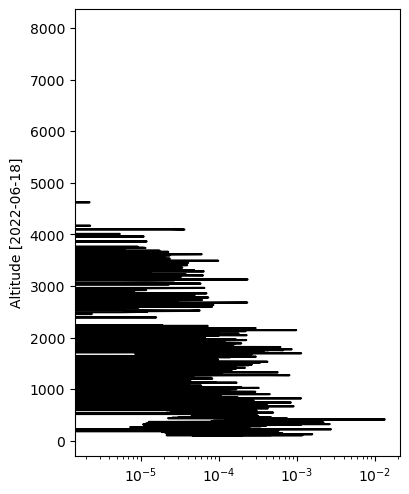

In [34]:
fig,ax = plt.subplots(figsize=(4, 5))
#plt.xscale("log")
ax.plot(DAY18_subset['LWC_FCDP_VOIGT']*1000, DAY18_subset['GPS_Altitude_THORNHILL'], color = "BLACK")
fig.tight_layout()
ax.set_xscale('log')
ax.set_ylabel('Altitude [2022-06-18]')